In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# Load Data

In [78]:
df = pd.read_csv('./bike.csv')
df.head()

,Sale_ID,Date,Customer_ID,Bike_Model,Price,Quantity,Store_Location,Salesperson_ID,Payment_Method,Customer_Age,Customer_Gender
0,1,11-07-2022,9390,Cruiser,318.32,1,Philadelphia,589,Apple Pay,70,Female
1,2,03-05-2024,3374,Hybrid Bike,3093.47,4,Chicago,390,Apple Pay,37,Male
2,3,01-09-2022,2689,Folding Bike,4247.99,3,San Antonio,338,PayPal,59,Female
3,4,28-09-2022,3797,Mountain Bike,1722.01,3,San Antonio,352,Apple Pay,19,Male
4,5,05-01-2021,1633,BMX,3941.44,3,Philadelphia,580,PayPal,67,Female


In [80]:
# SET INDEX KE KOLOM 'Sale_ID'

In [82]:
df.set_index('Sale_ID')
df.head()

,Sale_ID,Date,Customer_ID,Bike_Model,Price,Quantity,Store_Location,Salesperson_ID,Payment_Method,Customer_Age,Customer_Gender
0,1,11-07-2022,9390,Cruiser,318.32,1,Philadelphia,589,Apple Pay,70,Female
1,2,03-05-2024,3374,Hybrid Bike,3093.47,4,Chicago,390,Apple Pay,37,Male
2,3,01-09-2022,2689,Folding Bike,4247.99,3,San Antonio,338,PayPal,59,Female
3,4,28-09-2022,3797,Mountain Bike,1722.01,3,San Antonio,352,Apple Pay,19,Male
4,5,05-01-2021,1633,BMX,3941.44,3,Philadelphia,580,PayPal,67,Female


In [84]:
# CEK APAKAH DATA KOSONG

In [86]:
df.isna().sum()

Sale_ID            0
Date               0
Customer_ID        0
Bike_Model         0
Price              0
Quantity           0
Store_Location     0
Salesperson_ID     0
Payment_Method     0
Customer_Age       0
Customer_Gender    0
dtype: int64

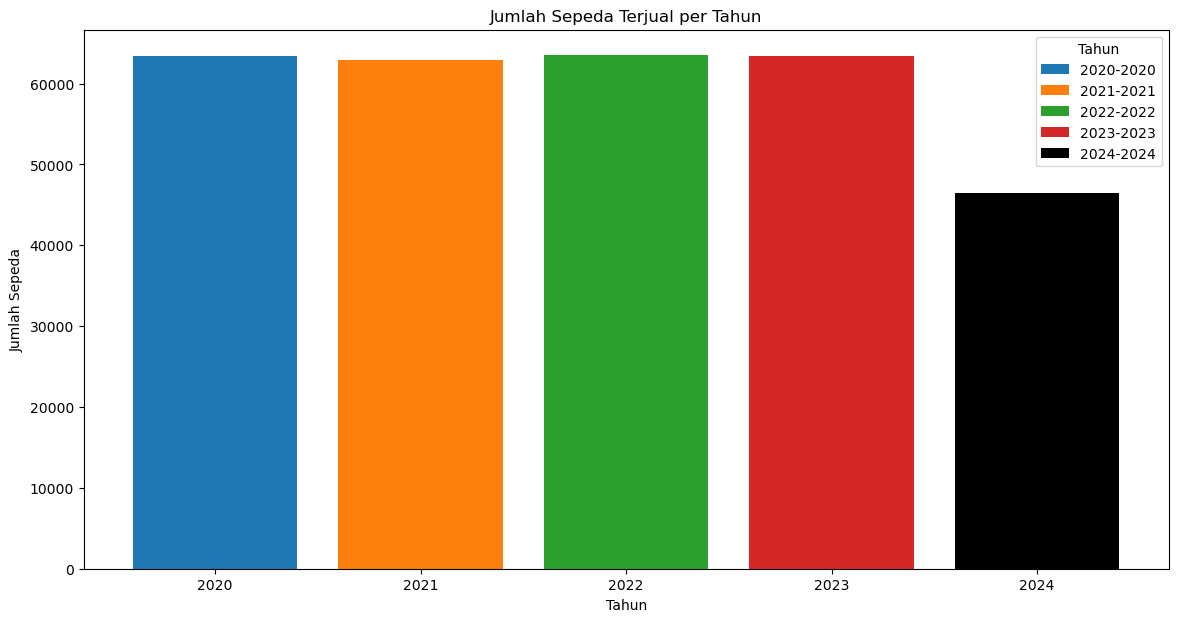

Year
2020    63463
2021    62943
2022    63480
2023    63391
2024    46434
Name: Quantity, dtype: int64

In [88]:
# Mengonversi kolom 'Date' menjadi tipe datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Mengelompokkan data berdasarkan tahun dan menghitung jumlah sepeda terjual per tahun
df['Year'] = df['Date'].dt.year  # Menambahkan kolom Tahun
sepeda_per_year = df.groupby('Year')['Quantity'].sum()  # Jumlahkan quantity per tahun

# Menyiapkan rentang tahun dan warna
year_ranges = [(2020, 2020), (2021, 2021), (2022, 2022), (2023, 2023), (2024, 2024)]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#000000']

# Menyiapkan plot
plt.figure(figsize=(14, 7))

# Loop untuk memplot berdasarkan rentang tahun
for (start_year, end_year), color in zip(year_ranges, colors):
    # Filter data berdasarkan tahun tertentu
    filtered_data = sepeda_per_year[sepeda_per_year.index == start_year]
    
    # Plot untuk tahun tertentu
    plt.bar(filtered_data.index, filtered_data.values, color=color, label=f'{start_year}-{end_year}')

# Menambahkan judul dan label
plt.title("Jumlah Sepeda Terjual per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Sepeda")

# Menambahkan legenda
plt.legend(title="Tahun")

# Menampilkan plot
plt.show()

# Menampilkan data sepeda per tahun
sepeda_per_year


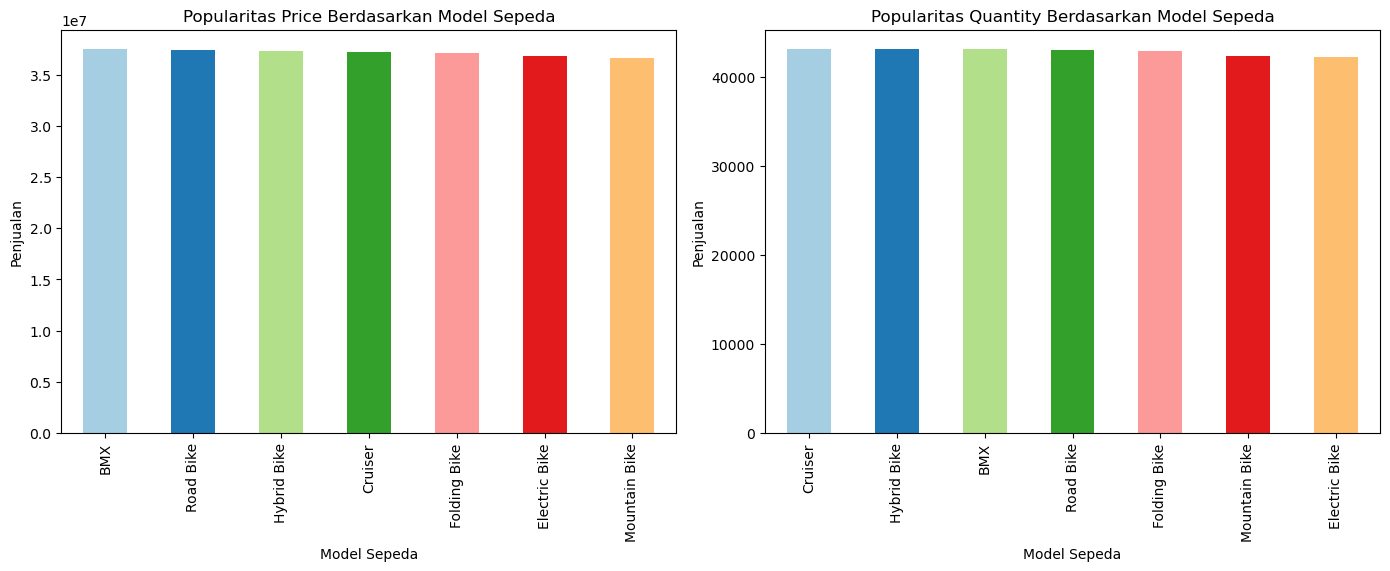

In [92]:
# Mengambil nama kolom yang relevan (mengganti sesuai kolom yang ada)
sales_columns = ['Price', 'Quantity']

# Menyiapkan ukuran plot
plt.figure(figsize=(14, 10))

# Looping untuk setiap kolom penjualan
for i, region in enumerate(sales_columns, 1):
    plt.subplot(2, 2, i)  # Menambahkan subplot untuk setiap region
    # Mengelompokkan data berdasarkan genre dan wilayah, kemudian memilih genre dengan penjualan > 0
    region_data = df.groupby('Bike_Model')[region].sum()  # Menggunakan 'Bike_Model' atau 'Genre' jika ada
    region_data = region_data[region_data > 0]  # Hanya menampilkan yang ada (penjualan > 0)
    region_data.sort_values(ascending=False).plot(kind='bar', color=plt.cm.Paired.colors)
    plt.title(f"Popularitas {region} Berdasarkan Model Sepeda")
    plt.xlabel("Model Sepeda")
    plt.ylabel("Penjualan")

plt.tight_layout()  # Menyesuaikan layout agar tidak tumpang tindih
plt.show()

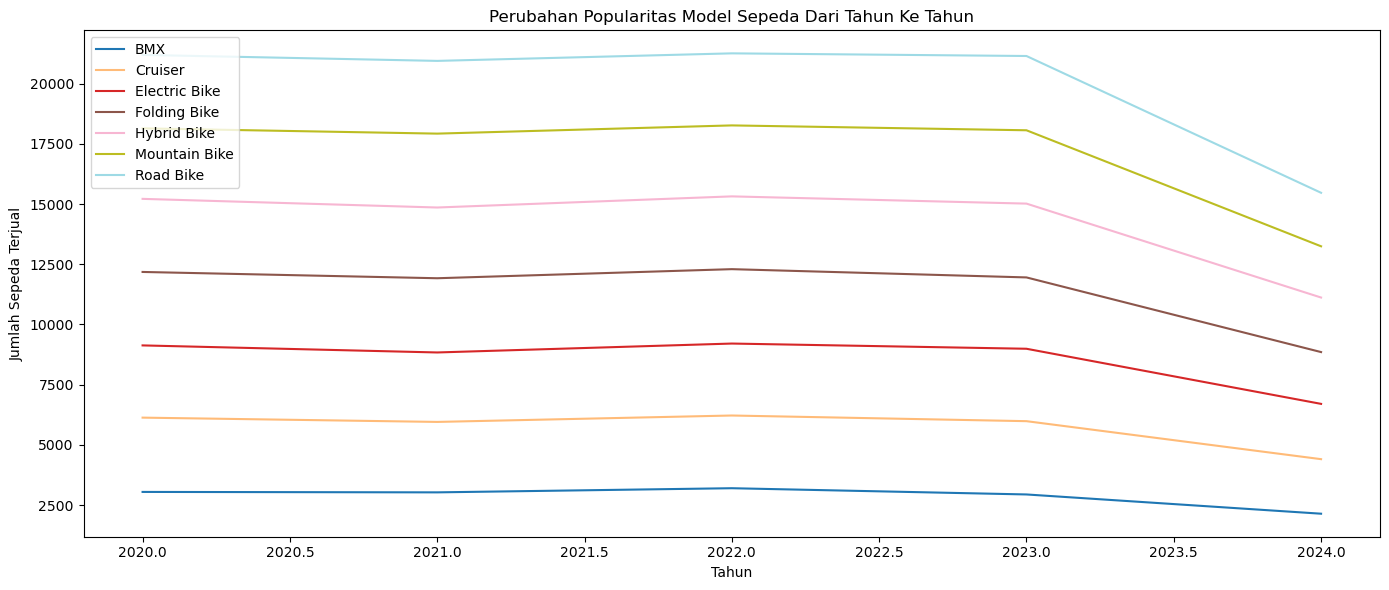

Bike_Model   BMX  Cruiser  Electric Bike  Folding Bike  Hybrid Bike  \
Year                                                                  
2020        3050     3084           2998          3049         3034   
2021        3032     2924           2883          3081         2936   
2022        3204     3018           2987          3088         3021   
2023        2945     3042           3006          2961         3064   
2024        2146     2264           2295          2150         2264   

Bike_Model  Mountain Bike  Road Bike  
Year                                  
2020                 2927       3049  
2021                 3067       3019  
2022                 2946       2991  
2023                 3044       3083  
2024                 2127       2221  


In [98]:
# Pastikan kolom yang relevan bertipe numerik
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # Gantilah dengan kolom yang sesuai jika ada

# Hitung jumlah sepeda per model dan tahun
bike_per_year = df.dropna(subset=['Year', 'Bike_Model']).groupby(['Year', 'Bike_Model']).size().unstack().fillna(0)

# Plot sebagai area chart
bike_per_year.plot(kind='line', stacked=True, figsize=(14, 6), colormap='tab20')
plt.title('Perubahan Popularitas Model Sepeda Dari Tahun Ke Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Sepeda Terjual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Menampilkan hasil analisis
print(bike_per_year)


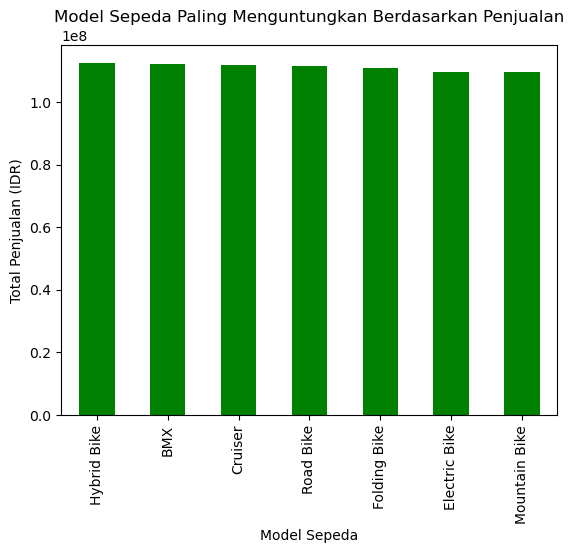

Bike_Model
Hybrid Bike      1.125055e+08
BMX              1.121461e+08
Cruiser          1.118491e+08
Road Bike        1.115796e+08
Folding Bike     1.109668e+08
Electric Bike    1.097502e+08
Mountain Bike    1.096370e+08
Name: Total_Sales, dtype: float64


In [100]:
# Menghitung total penjualan per model sepeda (Total Terjual = Price * Quantity)
df['Total_Sales'] = df['Price'] * df['Quantity']

# Hitung model sepeda yang paling menguntungkan (dengan total penjualan tertinggi)
most_profitable_model = df.groupby('Bike_Model')['Total_Sales'].sum().sort_values(ascending=False)

# Plot hasilnya sebagai bar chart
most_profitable_model.plot(kind='bar', color='green')
plt.title("Model Sepeda Paling Menguntungkan Berdasarkan Penjualan")
plt.xlabel("Model Sepeda")
plt.ylabel("Total Penjualan (IDR)")
plt.show()

# Menampilkan hasil analisis
print(most_profitable_model)


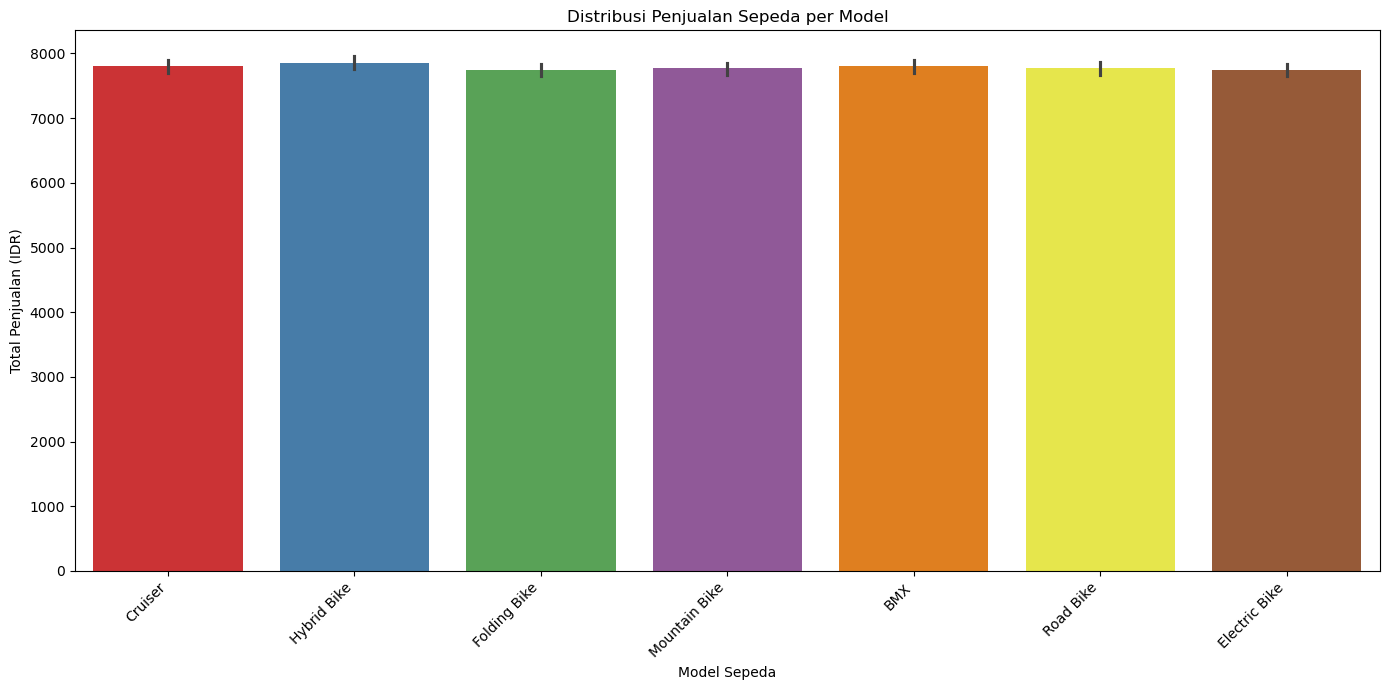

Index(['BMX', 'Road Bike', 'Cruiser', 'Folding Bike', 'Hybrid Bike',
       'Electric Bike', 'Mountain Bike'],
      dtype='object', name='Bike_Model')


In [118]:
# Filter model sepeda yang memiliki lebih dari 50 entri (jumlah sepeda yang terjual)
popular_models = df['Bike_Model'].value_counts()
popular_models = popular_models[popular_models >= 50].index
filtered_df = df[df['Bike_Model'].isin(popular_models)]

# Menyiapkan warna yang berbeda untuk setiap model sepeda
palette = sns.color_palette("Set1", len(popular_models))  # Menggunakan Set1 dengan jumlah warna sesuai model

# Plot
plt.figure(figsize=(14, 7))
sns.barplot(data=filtered_df, x='Bike_Model', y='Total_Sales', hue='Bike_Model', palette=palette, legend=False)

# Penyesuaian tampilan
plt.xticks(rotation=45, ha='right')
plt.title('Distribusi Penjualan Sepeda per Model')
plt.xlabel('Model Sepeda')
plt.ylabel('Total Penjualan (IDR)')
plt.tight_layout()
plt.show()

# Menampilkan daftar model sepeda yang populer
print(popular_models)
